## Correlation between lowercase_200000 model input and output length

In [18]:
import seaborn as sns
import pandas as pd

In [27]:
with open('output/small_lowercase-model_epoch1_21.47.t7.pred') as f:
    output = [x.strip() for x in f.readlines()]

In [28]:
with open('data/test/src-test.txt') as f:
    src = [x.strip() for x in f.readlines()]

In [29]:
input_len = [len(x) for x in src]
output_len = [len(y) for y in output]

data = pd.DataFrame({'input_len': input_len, 'output_len': output_len})

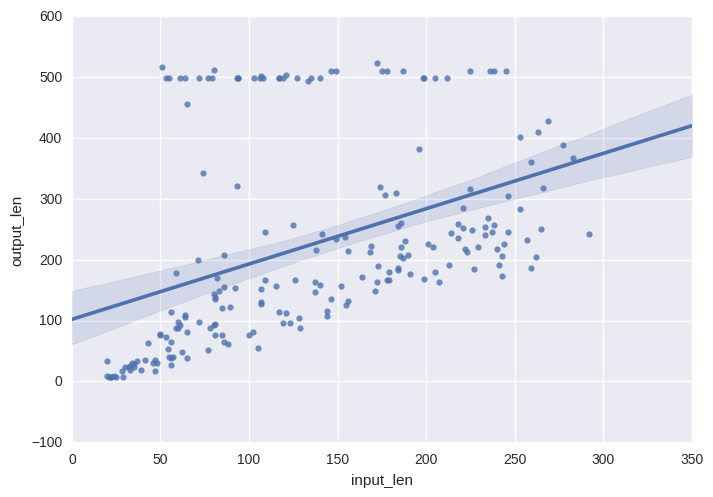

In [30]:
sns.regplot(x="input_len", y="output_len", data=data)
sns.plt.show()

The correlation is present, although very weak. Also, there seems to be a class of outliers that behave the same.

### What are these outliers on top?

In [33]:
outliers = [i for i,l in enumerate(output_len) if l > 450]

In [34]:
outliers

[0,
 9,
 13,
 18,
 25,
 29,
 32,
 34,
 55,
 67,
 72,
 80,
 81,
 83,
 85,
 88,
 89,
 93,
 96,
 108,
 112,
 114,
 117,
 122,
 127,
 131,
 137,
 142,
 144,
 157,
 158,
 159,
 160,
 170,
 175,
 179,
 182,
 187,
 193]

In [36]:
for i in outliers:
    print(output[i])

[ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [
] [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [ [


It seems that the output phase can get stuck in a place where it just generates opening brackets. Since opening brackets often occur together, one can imagine that if the RNN behaves as in a Markov model, not looking too far behind, this could happen.

Let's look at the correlation without these outliers.

In [40]:
outliers = set(outliers)
no_outlier_output_len = [x for i, x in enumerate(output_len) if i not in outliers]
no_outlier_input_len = [x for i, x in enumerate(input_len) if i not in outliers]
no_outlier_data = pd.DataFrame({'input_len': no_outlier_input_len, 'output_len': no_outlier_output_len})

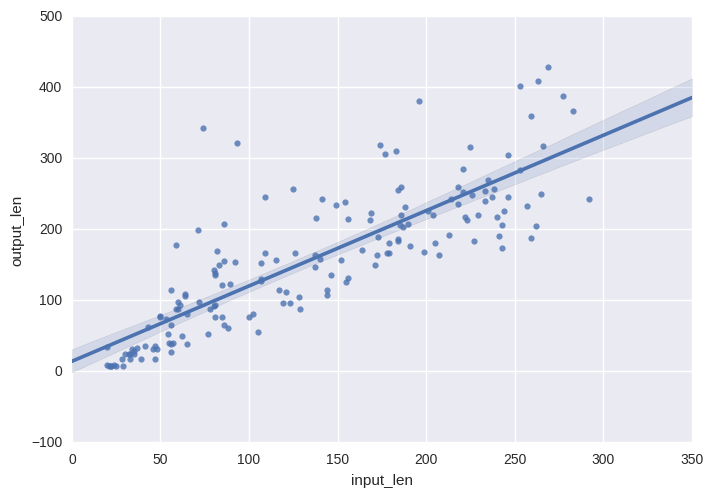

In [41]:
sns.regplot(x="input_len", y="output_len", data=no_outlier_data)
sns.plt.show()

The correlation is much stronger now.